In [24]:
import numpy as np
from joblib import Parallel, delayed

def rejection_sampler(p, k, n_samples=1000):
    
    """
    Generate samples from Bernoulli distributions conditioned on their sum being k.

    Parameters:
    - p: Probabilities for each Bernoulli variable.
    - k: Desired sum.
    - n_samples: Number of samples to generate.

    Returns:
    - accepted_samples: Array of valid samples.
    - attempts: Total number of attempts.
    """
    p = np.array(p)
    N = len(p)
    accepted_samples = []
    attempts = 0

    while len(accepted_samples) < n_samples:
        # Generate a sample of N independent Bernoulli random variables
        sample = np.random.rand(N) < p
        attempts += 1
        # Check if the sum equals k
        if sample.sum() == k:
            accepted_samples.append(sample)
    
    return np.array(accepted_samples), attempts



# Dictionary to store acceptance rates for each size and k
acceptance_rates = {}

# Implement the algorithm for different p arrays of varying sizes
for size in [10, 50, 100, 500, 1000]:  # Array sizes to test
    p = np.random.rand(size)
    acceptance_rates[size] = {}
    print(f"Testing for array size: {size}")
    # Test for different values of k ranging from The 
    exp = np.sum(p)  # Calculate the expected sum of the Bernoulli variables
    
    k_min = int(max(1, exp - len(p) / 20))  # Lower bound for k
    k_max = int(min(exp + len(p) / 20, size))  # Upper bound for k
    for k in range(k_min, k_max + 1):  # k ranging from 1 to 100 or size, whichever is smaller
        # Use a single sample for large arrays to avoid memory issues
        n_samples = 10 if size >= 500 else 100
        samples, attempts = rejection_sampler(p, k, n_samples=n_samples)
        acceptance_rate = samples.shape[0] / attempts
        acceptance_rates[size][k] = acceptance_rate
        print(f"Array size: {size}, k: {k}")
        print("Number of accepted samples:", samples.shape[0])
        print("Total attempts made:", attempts)
        print("Acceptance rate:", acceptance_rate)
        print("-" * 40)




Testing for array size: 10
Array size: 10, k: 4
Number of accepted samples: 100
Total attempts made: 369
Acceptance rate: 0.27100271002710025
----------------------------------------
Array size: 10, k: 5
Number of accepted samples: 100
Total attempts made: 376
Acceptance rate: 0.26595744680851063
----------------------------------------
Testing for array size: 50
Array size: 50, k: 22
Number of accepted samples: 100
Total attempts made: 1260
Acceptance rate: 0.07936507936507936
----------------------------------------
Array size: 50, k: 23
Number of accepted samples: 100
Total attempts made: 1048
Acceptance rate: 0.09541984732824428
----------------------------------------
Array size: 50, k: 24
Number of accepted samples: 100
Total attempts made: 722
Acceptance rate: 0.13850415512465375
----------------------------------------
Array size: 50, k: 25
Number of accepted samples: 100
Total attempts made: 670
Acceptance rate: 0.14925373134328357
----------------------------------------
Arra

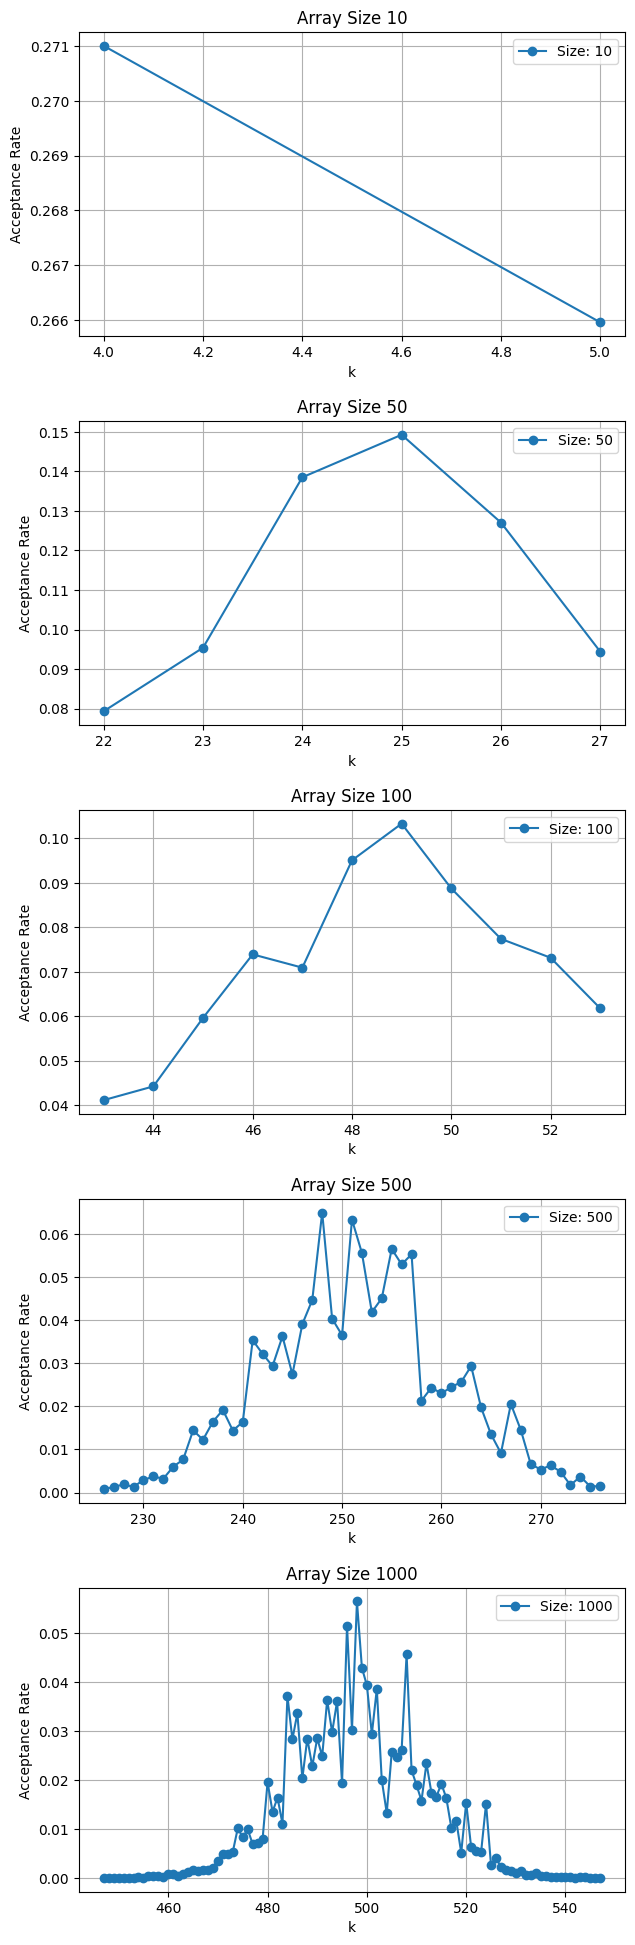

In [30]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=len(acceptance_rates), ncols=1, figsize=(7, 20))
fig.tight_layout(pad=4.0)

# Iterate over the sizes and their corresponding k_dict
for ax, (size, k_dict) in zip(axes, acceptance_rates.items()):
    k_values = list(k_dict.keys())
    rates = list(k_dict.values())
    
    ax.plot(k_values, rates, marker='o', label=f'Size: {size}')
    ax.set_xlabel('k')
    ax.set_ylabel('Acceptance Rate')
    ax.set_title(f'Array Size {size}')
    ax.legend()
    ax.grid(True)

plt.show()



In [ ]:
from scipy.stats import entropy

# Generate 1000 random arrays for each size and select 5 arrays with increasing entropies
random_arrays_entropy = {}

for size in [10, 50, 100, 500, 1000]:
    random_arrays = [np.random.rand(size) for _ in range(1000)]
    entropies = [entropy(arr, base=2) for arr in random_arrays]
    
    # Sort arrays by their entropy
    sorted_indices = np.argsort(entropies)
    interval_indices = np.linspace(0, len(sorted_indices) - 1, 6, dtype=int)
    selected_indices = sorted_indices[interval_indices]
    selected_arrays = [random_arrays[i] for i in selected_indices]  # Select 5 arrays with increasing entropies
    
    random_arrays_entropy[size] = selected_arrays


Testing for array size: 10


KeyboardInterrupt: 

In [41]:
entropy(np.random.rand(1000), base=2)

9.677528561886644